In [1]:
import tkinter as tk,threading
import tkinter.font as tkFont
from tkinter import *
from PIL import Image, ImageTk
import cv2
import imageio
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import os
import numpy as np
import random
from matplotlib.animation import FuncAnimation
from itertools import count
import datetime
import tkinter.ttk as ttk
import customtkinter

class App:
    def __init__(self, root):
        #setting title
        root.title("Blender Monitor")
        #setting window size
        width=400
        height=500
        screenwidth = root.winfo_screenwidth()
        screenheight = root.winfo_screenheight()
        alignstr = '%dx%d+%d+%d' % (width, height, (screenwidth - width) / 2, (screenheight - height) / 2)
        root.geometry(alignstr)
        root.resizable(width=False, height=False)
        customtkinter.set_appearance_mode("System")  # Modes: system (default), light, dark
        GLabel_402=tk.Label(root)
        ft = tkFont.Font(family='Times',size=14)
        GLabel_402["font"] = ft
        GLabel_402["fg"] = "#333333"
        GLabel_402["justify"] = "center"
        GLabel_402["text"] = "Power State: "
        GLabel_402.place(x=8,y=20,width=100,height=50)
        
        GLabel_403=tk.Label(root)
        ft = tkFont.Font(family='Times',size=14)
        GLabel_403["font"] = ft
        GLabel_403["fg"] = "white"
        GLabel_403["justify"] = "center"
        GLabel_403["text"] = "On" # add the condition here
        GLabel_403['bg'] = "green"
        GLabel_403.place(x=120,y=25,width=30,height=30)
        
        GLabel_404=tk.Label(root)
        ft = tkFont.Font(family='Times',size=14)
        GLabel_404["font"] = ft
        GLabel_404["fg"] = "#333333"
        GLabel_404["justify"] = "center"
        GLabel_404["text"] = "Direction: Clockwise" # add the CW/CWW here
        GLabel_404.place(x=180,y=20,width=200,height=50)

        GLabel_121=tk.Label(root)
        ft = tkFont.Font(family='Times',size=13)
        GLabel_121["font"] = ft
        GLabel_121["fg"] = "#333333"
        GLabel_121["justify"] = "center"
        GLabel_121["text"] = "Cam (RT)"
        GLabel_121.place(x=10,y=80,width=126,height=30)

        GLabel_765=tk.Label(root)
        ft = tkFont.Font(family='Times',size=14)
        GLabel_765["font"] = ft
        GLabel_765["fg"] = "#333333"
        GLabel_765["justify"] = "center"
        GLabel_765["text"] = "Sensor(RT)"
        GLabel_765.place(x=30,y=280,width=97,height=30)


        GLabel_120 = tk.Button(root, text = 'Real-time Cam', command= App.cam_video)
        GLabel_120.place(x=30,y=220,width=97,height=30)
        # Speed Level
        # def func():
        #     print(len(e.get()))
        # root.after(500,func)
        label3=tk.Label(root,text='Speed Level:',bg='gold',fg='blue',)
        label3.place(x=200,y=85)

        # Show speed window
        GLabel_119 = tk.Button(root, text = 'Speed', command= App.show_speed)
        GLabel_119.place(x=200,y=220,width=97,height=30)

        # Show realtime input
        GLabel_1192 = tk.Button(root, text = 'Real-time Input', command= App.realtime_input)
        GLabel_1192.place(x=30,y=380,width=97,height=30)

        # Show granularity
        lab1 = tk.Label(root,fg='blue')
        lab1["font"] =tkFont.Font(size=12)
        lab1["bg"] = "gold"
        lab1.pack()
        def update_granularity():
            lab1['text'] = "Current granularity: {}".format(random.randint(0,1000))
            lab1.place(x=200,y=350)
            root.after(100, update_granularity)
        update_granularity()

        # update real time speed
        lab = tk.Label(root)
        lab.pack()
        def update():
            lab['text'] = random.randint(0,1000)
            lab.place(x=200,y=120)
            root.after(100, update)
        update()

    # Show the real time input
    def realtime_input():
        newWindow = Toplevel(root)
        newWindow.title("Real-time Input")
        newWindow.geometry("500x500") 
        
        def set_label():
            currentTime = datetime.datetime.now()
            label['text'] += str(currentTime) + " -> "+str(random.randint(0,100))+"	 "+str(random.randint(0,100))+"	"+str(random.randint(0,100))+"\n"
            newWindow.after(10, set_label)
        label = tk.Label(master = newWindow, text="")
        label.pack()
        set_label()


    def show_speed():
        newWindow = Toplevel(root)
        newWindow.title("Speed Real-time Graph ")
        newWindow.geometry("500x500")  
        plt.style.use('fivethirtyeight')
        x = []
        y = []
        fig, ax = plt.subplots()
        index = count()
        pt = random.randint(1,9) # grab a random integer to be the next y-value in the animation 
        def animate():
            x.append(next(index))
            y.append(pt)
            ax.clear()
            ax.plot(x, y)
        label = tk.Label(master = newWindow, text="22").grid(column=0, row=0)
        canvas = FigureCanvasTkAgg(figure=fig, master=newWindow)
        canvas.get_tk_widget().grid(column=0, row=1)
        ani = FuncAnimation(fig, animate, interval=100, blit=False) 
        label.pack() 
                                 


        
       
        
    
        

        # Camara    
    def cam_video():
        # Solution: Click the link and check the real-time camara data 
        newWindow = Toplevel(root)
        width, height = 800, 600
        cap = cv2.VideoCapture(0)
        cap.set(cv2.CAP_PROP_FRAME_WIDTH, width)
        cap.set(cv2.CAP_PROP_FRAME_HEIGHT, height)
        newWindow.bind('<Escape>', lambda e: newWindow.quit())
        lmain = tk.Label(newWindow)
        lmain.pack()
        def show_frame():
            _, frame = cap.read()
            frame = cv2.flip(frame, 1)
            cv2image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
            img = Image.fromarray(cv2image)
            imgtk = ImageTk.PhotoImage(image=img, master = newWindow, width = width, height = height)
            lmain.imgtk = imgtk
            lmain.configure(image=imgtk)
            lmain.after(10, show_frame)
        show_frame()
        # Another solution: Use screen shot (1 pic will be generated and be saved)
        # cam_port = 0
        # cam = cv2.VideoCapture(cam_port)
        # result, image = cam.read()
        # if result:
        #     cv2.imshow("current_blender", image)
        #     cv2.imwrite("current_blender.png", image)
        #     cv2.waitKey(0)
        #     cv2.destroyWindow("current_blender")
        # else:
        #     print("No image detected. Please! try again")             
    
    

    def plot_values(self):
        x = [1,2]
        y = [2,3]
        figure = plt.figure(figsize=(5,2),dpi=10)
        figure.add_subfigure(111).plot(x,y)
        chart = FigureCanvasTkAgg(figure,self.plot)
        chart.get_tk_widget().grid(row = 5, column = 0)
        return None


if __name__ == "__main__":
    root = tk.Tk()
    # root.config(bg='#0f4b6e')
    app = App (root)
    root.mainloop()


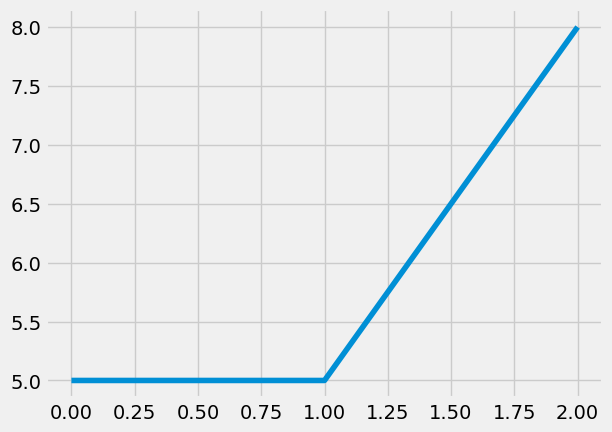

In [2]:
import random
import tkinter as Tk
from itertools import count

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

plt.style.use('fivethirtyeight')
# values for first graph
x = []
y = []
# # values for second graph
# y_vals2 = []
fig, ax = plt.subplots()
index = count()


def animate(i):
    pt = random.randint(1,9) # grab a random integer to be the next y-value in the animation
    x.append(next(index))
    y.append(pt)

    ax.clear()
    ax.plot(x, y)



# GUI
root = Tk.Tk()
label = Tk.Label(root, text="Realtime Animated Graphs").grid(column=0, row=0)

canvas = FigureCanvasTkAgg(figure=fig, master=root)
canvas.get_tk_widget().grid(column=0, row=1)
ani = FuncAnimation(fig, animate, interval=1000, blit=False)

Tk.mainloop()

In [ ]:
 def show_speed():
        newWindow = Toplevel(root)
        newWindow.title("Speed Real-time Graph ")
        newWindow.geometry("500x500")  
        # plt.style.use('fivethirtyeight')
        # x = []
        # y = []
        # fig,ax = plt.subplots()
        # index = count()
        # pt = random.randint(1,9) # grab a random integer to be the next y-value in the animation 
        # label = tk.Label(master = newWindow, text="22").grid(column=0, row=0)
        # label.pack() 
        plt.style.use('fivethirtyeight')
        # values for first graph
        x = []
        y = []
        # # values for second graph
        # y_vals2 = []
        fig, ax = plt.subplots()
        index = count()
        def animate():
            # t = np.arange(0, 3, .01)

            # f0 = tk.Toplevel()
            
            # fig = plt.figure(figsize=(8, 8))
            
            # fig.add_subplot(111).plot(t, 2 * np.sin(2 * np.pi * t))

            # canvas = FigureCanvasTkAgg(fig, f0)
            # toolbar = NavigationToolbar2Tk(canvas, f0)
            # toolbar.update()
            # canvas._tkcanvas.pack(fill=tk.BOTH, expand=1)
            
            
            # f0.pack(fill=tk.BOTH, expand=1)
            pt = random.randint(1,9) # grab a random integer to be the next y-value in the animation
            x.append(next(index))
            y.append(pt)

            ax.clear()
            ax.plot(x, y)
        fig.add_subplot(111).plot(x,y)
        canvas = FigureCanvasTkAgg(figure=fig, master=root)
        toolbar = NavigationToolbar2Tk(canvas, newWindow)
        toolbar.update()
        canvas._tkcanvas.pack(fill=tk.BOTH, expand=1)
        canvas.get_tk_widget().grid(column=0, row=1)
        # ani = FuncAnimation(plt.clf(), animate, interval=1000, blit=False)
        # animate()
            # x.append(next(index))
            # y.append(pt)
            # ax.clear()
            # ax.plot(x, y)
            # # plt.plot(x,y)
        # animate()
        # canvas = FigureCanvasTkAgg(figure=plt.gcf(), master=newWindow)
        # canvas.get_tk_widget().grid(column=0, row=1)
        # canvas.show().pack

        # ani = FuncAnimation(plt.gcf(), animate, interval=100, blit=False) 
        # plt.show()
        # fig.plot(x,2*y)
        # canvas.draw()

In [ ]:
def animate():
            t = np.arange(0, 3, .01)

            f0 = tk.Toplevel()
            
            fig = plt.figure(figsize=(8, 8))
            
            fig.add_subplot(111).plot(t, 2 * np.sin(2 * np.pi * t))

            canvas = FigureCanvasTkAgg(fig, f0)
            toolbar = NavigationToolbar2Tk(canvas, f0)
            toolbar.update()
            canvas._tkcanvas.pack(fill=tk.BOTH, expand=1)
            
            
            f0.pack(fill=tk.BOTH, expand=1)
        animate()

In [ ]:
def cam_video():
        # Solution: Click the link and check the real-time camara data 
        newWindow = Toplevel(root)
        width, height = 800, 600
        cap = cv2.VideoCapture(0)
        cap.set(cv2.CAP_PROP_FRAME_WIDTH, width)
        cap.set(cv2.CAP_PROP_FRAME_HEIGHT, height)
        newWindow.bind('<Escape>', lambda e: newWindow.quit())
        lmain = tk.Label(newWindow)
        lmain.pack()
        def show_frame():
            _, frame = cap.read()
            frame = cv2.flip(frame, 1)
            cv2image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
            img = Image.fromarray(cv2image)
            imgtk = ImageTk.PhotoImage(image=img, master = newWindow, width = width, height = height)
            lmain.imgtk = imgtk
            lmain.configure(image=imgtk)
            lmain.after(10, show_frame)
        show_frame()